# Load Libraries and Dataset

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Load dataset
data = pd.read_csv("Sales.csv")

In [3]:
#Display dataset overview
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Data Cleaning and Transformation

In [4]:
#Ensure 'Order Date' and 'Ship Date' are in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

In [5]:
#Check for duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [6]:
# Detecting missing values
missing_values = data.isnull().sum()
print(missing_values)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [7]:
#Check which Postal Codes are missing
missing_postal_codes = data[data['Postal Code'].isna()]
print(missing_postal_codes)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2234    2235  CA-2018-104066 2018-12-05 2018-12-10  Standard Class   
5274    5275  CA-2016-162887 2016-11-07 2016-11-09    Second Class   
8798    8799  US-2017-150140 2017-04-06 2017-04-10  Standard Class   
9146    9147  US-2017-165505 2017-01-23 2017-01-27  Standard Class   
9147    9148  US-2017-165505 2017-01-23 2017-01-27  Standard Class   
9148    9149  US-2017-165505 2017-01-23 2017-01-27  Standard Class   
9386    9387  US-2018-127292 2018-01-19 2018-01-23  Standard Class   
9387    9388  US-2018-127292 2018-01-19 2018-01-23  Standard Class   
9388    9389  US-2018-127292 2018-01-19 2018-01-23  Standard Class   
9389    9390  US-2018-127292 2018-01-19 2018-01-23  Standard Class   
9741    9742  CA-2016-117086 2016-11-08 2016-11-12  Standard Class   

     Customer ID     Customer Name      Segment        Country        City  \
2234    QJ-19255      Quincy Jones    Corporate  United States  Burlington   
527

In [8]:
## Check data types of all columns in the DataFrame
print(data.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [9]:
## Check data types of column Postal Code
print(data['Postal Code'].dtype)

float64


In [10]:
# Convert the 'Postal Code' column to string type
data['Postal Code'] = data['Postal Code'].astype(str)

In [11]:
## Check data types of column Postal Code
print(data['Postal Code'].dtype)

object


In [12]:
# Fill missing postal codes for Burlington with '05401'
data.loc[data['City'] == 'Burlington', 'Postal Code'] = data.loc[data['City'] == 'Burlington', 'Postal Code'].fillna('05401')

# Key Insights and Analysis

## Top-Performing Categories and Sub-Categories by Sales

In [13]:
# Total sales by category
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Category:\n", category_sales)

# Add space between results
print("\n")

# Total sales by sub-category
subcategory_sales = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Sub-Category:\n", subcategory_sales)

Total Sales by Category:
 Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


Total Sales by Sub-Category:
 Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64


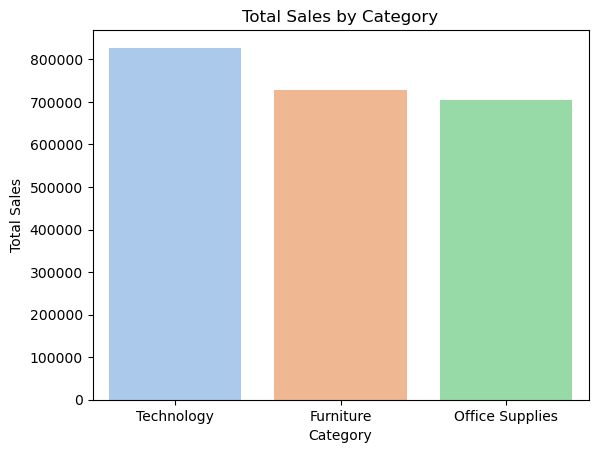

In [45]:
# Create bar plot with a color palette
sns.barplot(x=category_sales.index, y=category_sales.values, palette = 'pastel')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

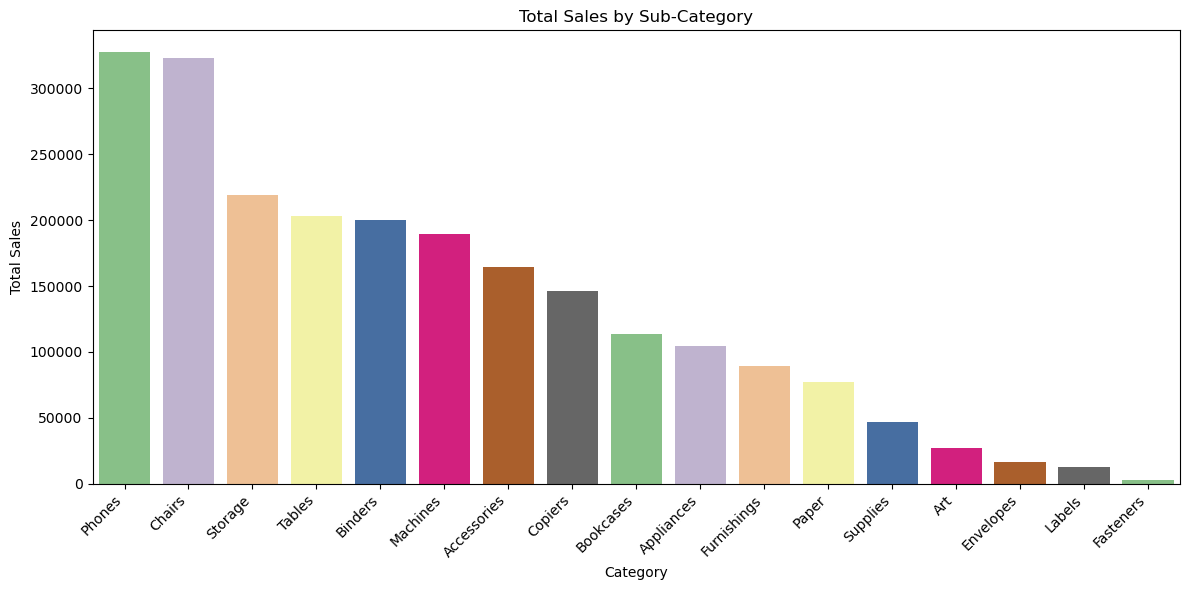

In [36]:
# Create bar plot with a color palette
plt.figure(figsize=(12, 6))  # Adjust figure size if required
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values, palette ='Accent')
plt.title("Total Sales by Sub-Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Ensure proper spacing       
plt.show()

## Sales Performance by Customer Segment, Region & Top 10 Cities

In [24]:
segment_sales = data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("Total sales by Segment\n", segment_sales)

print("\n")

regional_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("Total sales by Region\n", regional_sales)

print("\n")

city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by City (Top 10):\n", city_sales.head(10))

Total sales by Segment
 Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


Total sales by Region
 Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


Total Sales by City (Top 10):
 City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64


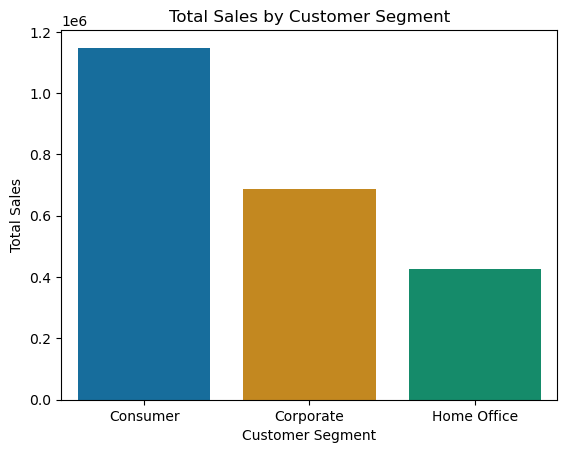

In [39]:
# Create bar plot with a color palette
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette ='colorblind')
plt.title("Total Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.show()

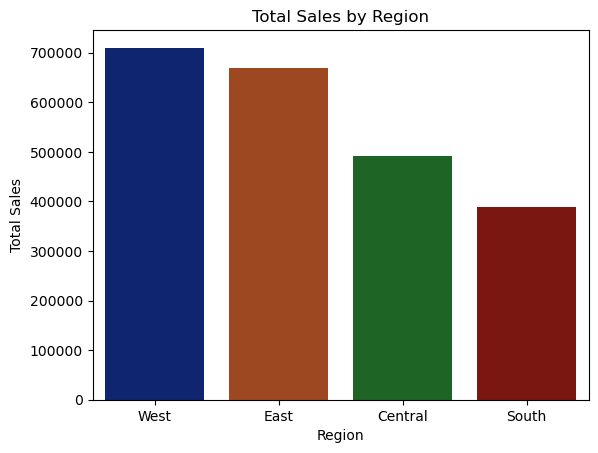

In [23]:
# Create bar plot with a color palette
sns.barplot(x=regional_sales.index, y=regional_sales.values, palette = 'dark')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

Text(0, 0.5, 'Total Sales')

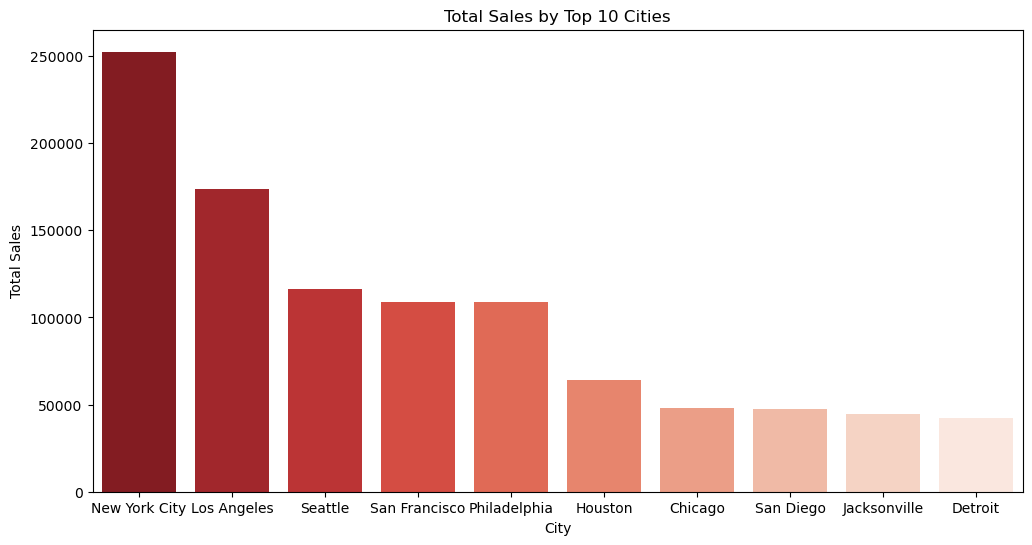

In [30]:
# Create bar plot with a color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.head(10).index, y=city_sales.head(10).values, palette='Reds_r')
plt.title("Total Sales by Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Total Sales")

## Sales Trend Analysis Over Time

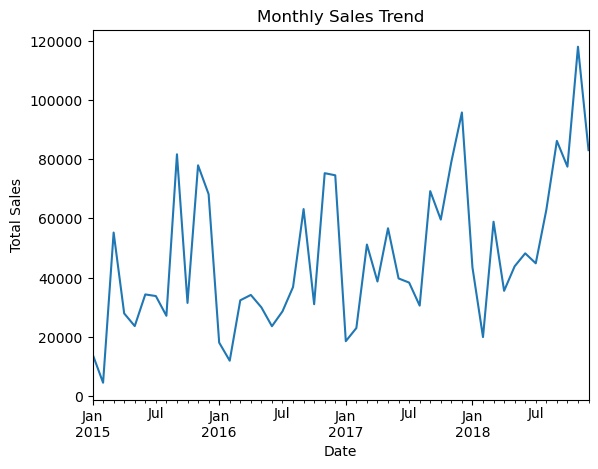

In [31]:
monthly_sales = data.set_index('Order Date').resample('M')['Sales'].sum()
monthly_sales.plot(title = "Monthly Sales Trend", xlabel = "Date", ylabel ="Total Sales")
plt.show()

C:\Users\FATMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\FATMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



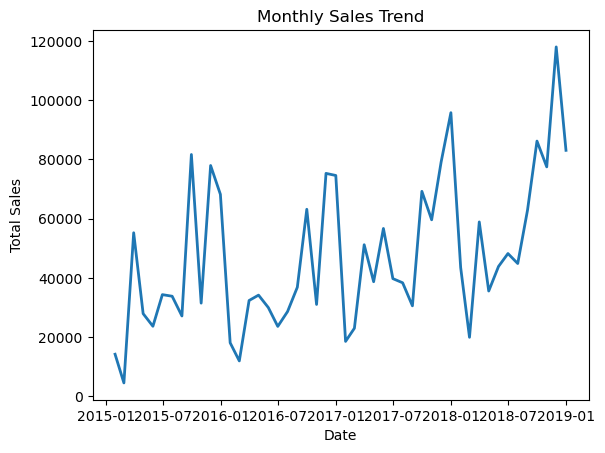

In [33]:
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, linewidth=2)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

## Shipping Performance Assessment

In [52]:
# Average sales by ship mode
shipmode_sales = data.groupby('Ship Mode')['Sales'].mean().sort_values(ascending=False)
print("Average Sales by Ship Mode:\n", shipmode_sales)

print("\n")

# Calculate shipping duration (Ship Date - Order Date)
data['Shipping Duration'] = (data['Ship Date'] - data['Order Date']).dt.days

print("\n")

# Average shipping duration by ship mode
shipping_duration = data.groupby('Ship Mode')['Shipping Duration'].mean().sort_values(ascending=False)
print("Average Shipping Duration by Ship Mode:\n", shipping_duration)

Average Sales by Ship Mode:
 Ship Mode
Second Class      236.547939
Same Day          232.749143
First Class       230.228020
Standard Class    228.849856
Name: Sales, dtype: float64




Average Shipping Duration by Ship Mode:
 Ship Mode
Standard Class    5.008363
Second Class      3.249211
First Class       2.179214
Same Day          0.044610
Name: Shipping Duration, dtype: float64


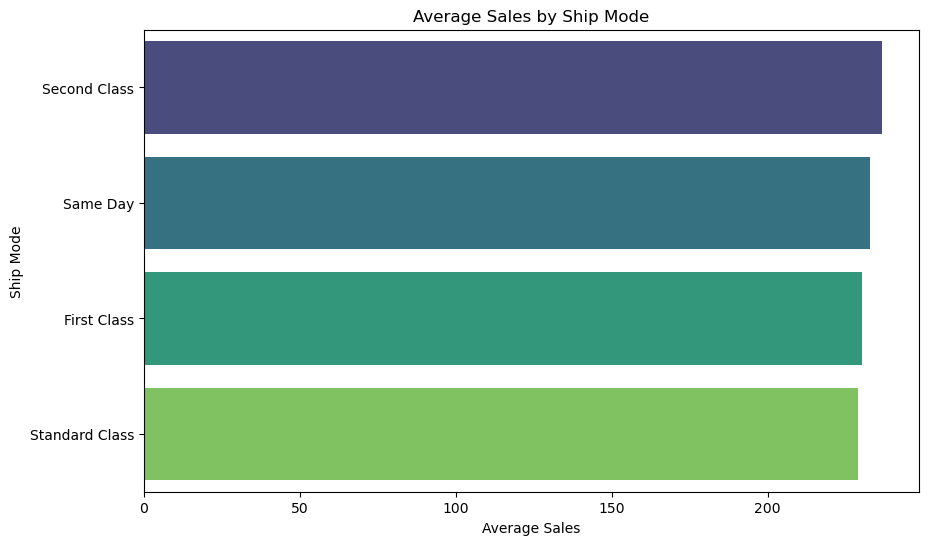

In [48]:
# Horizontal Bar Plot for Average Sales by Ship Mode
plt.figure(figsize=(10, 6))
sns.barplot(x=shipmode_sales.values, y=shipmode_sales.index, palette='viridis')
plt.title("Average Sales by Ship Mode")
plt.xlabel("Average Sales")
plt.ylabel("Ship Mode")
plt.show()

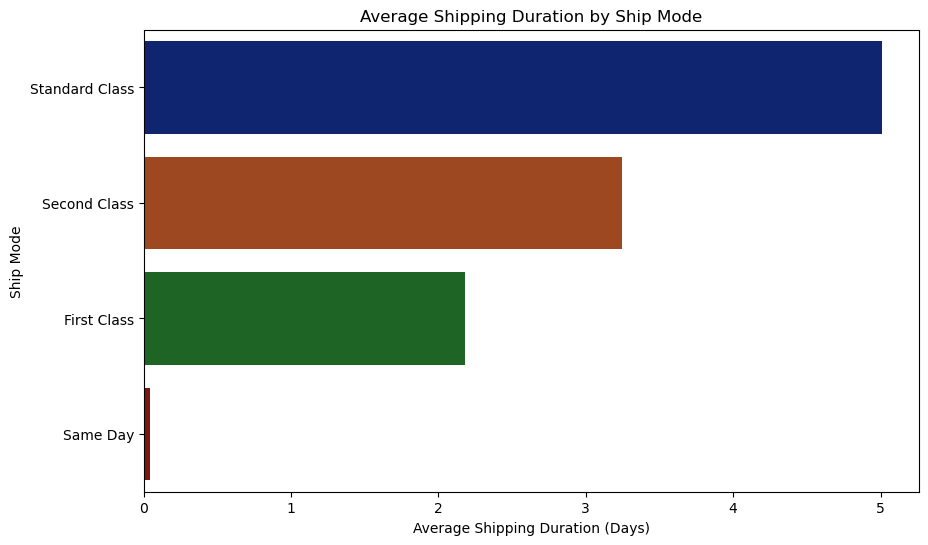

In [61]:
# Horizontal Bar Plot for Average Shipping Duration by Ship Mode
plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_duration.values, y=shipping_duration.index, palette='dark')
plt.title("Average Shipping Duration by Ship Mode")
plt.xlabel("Average Shipping Duration (Days)")
plt.ylabel("Ship Mode")
plt.show()